# Assignment 13 --- Neural Network
#### Group members: Gege Li, Zhihong Zhang, Zhijing Zhang


## Introduction 
In this assignment, we are going to construct a series of different neural network models for a provided data set and compare/contrast the performance of the varying models against one another. The data set was built upon a popular dataset of diamonds from the UCI repository. Comparing with the common usage of predicting the price of the diamond, in this task, we applied these different models for predicting the cut. 

For the steps we will use in this project, we will launch EDA firstly, and based on the EDA, we will apply Data preparation which includes tidy invalid values, add/remove features for modeling, etc. After Data Prep, we relaunch EDA to analyze the data. Then based on the given information, we will build several models according to the project requirement. Compare the performance of each model, we will finally identify a preferred model and get our conclusion.

##  Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd

# check and read the dataset from github
df = pd.read_csv('https://raw.githubusercontent.com/gegeli638/DAV-6150/master/Project3_Data.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


This data frame have 53940 rows and 10 variables:

- price: price in US dollars (\$326--\$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from D (best) to J (worst)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm (0--10.74)
- y: width in mm (0--58.9)
- z: depth in mm (0--31.8)
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

As we can see, there are three categorical data(cut, color, clarity) and 7 numerical data(price, carat, x,y,z, depth, table).

In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There is no null value for it. Let's check the details.

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


It doesn't make any sense to have either of Length or Width or Height to be zero, so we would find them and move them out. We will do that later in Data preparation part.

To begin our data preparation, we will see each of the attributes firstly. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


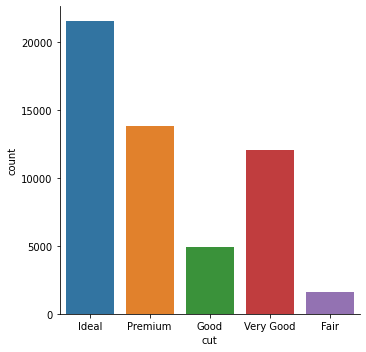

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.factorplot(x='cut', data=df , kind='count' )#,aspect=2.5

Based on the diamond cut distribution, we know it is also not quite balanced data, about 40% of the whole data set is the ideal cut of ideal quality. 

In [ ]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

The first thing we need to notice is that the null-error rate of ideal cut, which contributes to 41.84%(21548/51506), about one half of the whole population. We need to notice that it is not a quite balanced data. Since we will use decision tree and random forest algorithm which does not require us to deal with imbalanced nature of the data. Also, based on our reference, the gradient boost algorithm has the advantage of dealing with the imbalanced nature of the data set. Therefore, based on the models we will use, the imbalanced nature of the data set should not be worried. Among all five models, built-in weighted parameters are used for all algorithms. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1065bd8c88>,
      dtype=object)

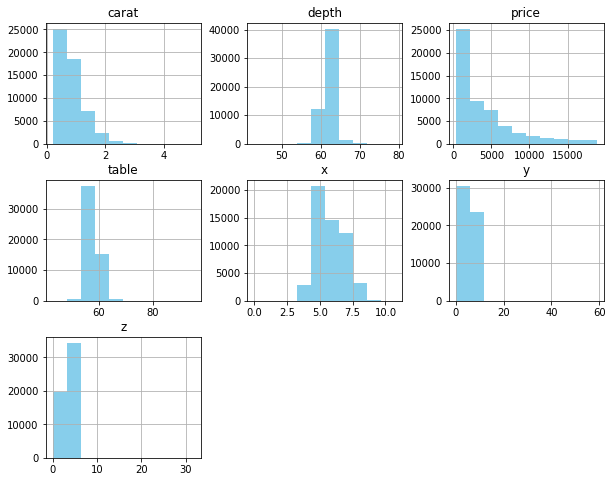

In [ ]:
#plot numerical data histogram
df.hist(figsize=(10,8), color='skyblue')

From this basic histogram, we can see
- The distribution of price and carat is a little right-skewed.
- x is kind of normal distribution, but y and z are focused more between 0 to 10.
- The maximum value of table and depth are around approximately 60.

All the attributes except y and z are all shown some diverse patterns, and they may provide some extra information. From this graph, most of the attributes are all potential good candidates for our selected explanatory variable. For detailed analysis, we can use other plots later.

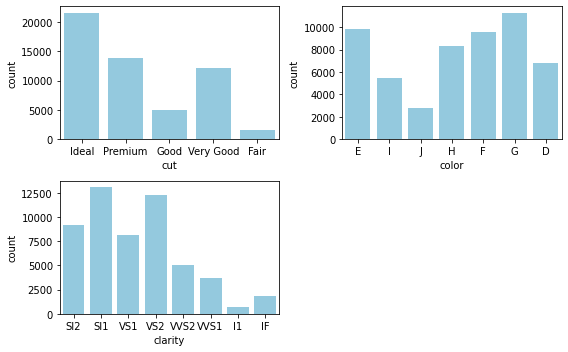

In [ ]:
#plot categorical data
fig, axes =plt.subplots(2,2, figsize=(8,5)) #, sharex=True
axes = axes.flatten()
#remove last plot
axes.flat[-1].set_visible(False)

object_bol = df.dtypes == 'object'
for ax, catplot in zip(axes, df.dtypes[object_bol].index):
    sns.countplot(x=catplot, data=df, ax=ax, color = 'skyblue')
plt.tight_layout()  
plt.show()

From this count plot, we can see
- The worst color J and worst clarity l1 have less count.
- But the best color D and best clarity IF are not the most count.
- Color G and clarity SI1 have the most count.

Then we are going to see their relationship.

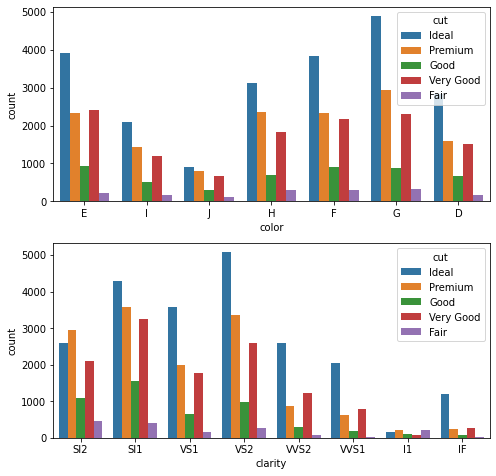

In [ ]:
#relationship of categorical data 

fig, axes =plt.subplots(3,1, figsize=(7,10)) #, sharex=True
axes = axes.flatten()
axes.flat[0].set_visible(False)
object_bol = df.dtypes == 'object'
for ax, catplot in zip(axes, df.dtypes[object_bol].index):
    sns.countplot(x=catplot,hue='cut', data=df, ax=ax)#, color='skyblue'
plt.tight_layout()  
plt.show()

Based on the histogram above, we can see that almost all color has the same order of the distribution which follows ideal, premium, very good, good, and fair by counts. This quite uniform distribution implies quite high entropy and this may not be useful for our further feature selection.


Clarity is a bit different, from the left of the WS2, based on the height, almost all left side clarity type has the order of ideal, premium very good and fair. But on the right side, the order is mainly different.
Simply speaking, the clarity has a more diverse distribution which brings a lower entropy which implies it can be a possible good feature for further modeling.

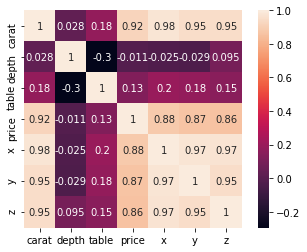

In [ ]:
##relationship of numerical data--- Correlation Map
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [ ]:
#relationship of numerical data
#sns.pairplot(data=df)

Based on this heatmap/correlation matrix, we can have these findings and insights.

- Carat has quite a strong linear correlation with price,x,y, and z. It actually makes sense, since the size is related to the dimension of the diamond. Also, it is common that the larger size of diamonds has a higher price.



- Table has also a quite strong linear correlation with x,y, and z. By definition, table is the term related to the dimension of the diamond, and it is also obvious that it has a correlation with these terms x,y, and z. 



Since the colinearity of the dimension of the diamond. Through this diagram, we knew that there are some collinearities among x,y, and z. To deal with this fact, we may consider to covert these three features into a new feature- the volume of the diamond. We will do this step in data preparation part.

The we are going to see some details in the relationship of some features and response variable.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


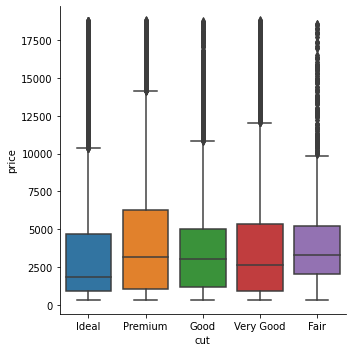

In [ ]:
# Cut vs Price
sns.factorplot(x='cut', y='price', data=df, kind='box') #,aspect=2.5 
#sns.catplot(x="cut", y="price", kind="box", data=df);

When we plot the cut by price plot, it is interesting to see that with the ideal cut, the median price of the ideal cut is still below all other parts. it may imply that cut is not the main factor affecting the price. ( Our assumption is that size, or we call carat, plays a more important role in the price.

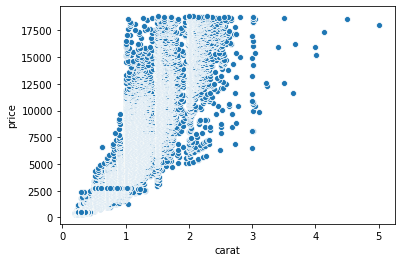

In [ ]:
sns.scatterplot(x="carat", y="price",data=df) #kind="box",   color = 'b',
#sns.factorpslot(x="carat", y="price", kind="box", color = 'b' ,data=df)

Although it is not required, through this graph, we can verify our assumption that price has a more strong correlation with carat instead of cut.

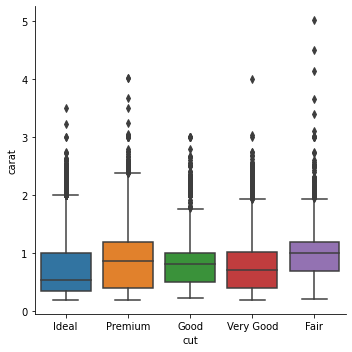

In [ ]:
#cut vs carat
sns.catplot(x="cut", y="carat", kind="box", data=df)#,aspect=2.5 

Through this graph, we can tell that size of the diamond may be a good explanatory variable for predicting the cut.

We can find that the overall ideal cut is dense within one carat, especially for 75% quantile, and it reached at reached exactly 1 carat. Another noticeable point is that the median carat of ideal cut is significantly below other features. Our assumption is that for the smaller size of the diamond, the company may want to cut it well for compensating its disadvantages and still make it a better selling point at the market.

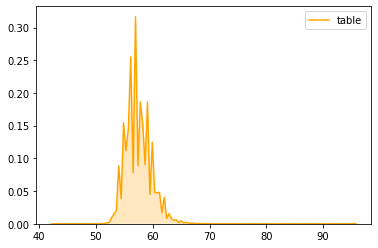

In [ ]:
#kdeplot--- table
sns.kdeplot(df['table'] ,shade=True , color='orange')

Table attribute has a nice normal distribution of density. It is a good sign since it is not a uniform distribution which will not provide much information. Then we plot another plot to see in detail. 

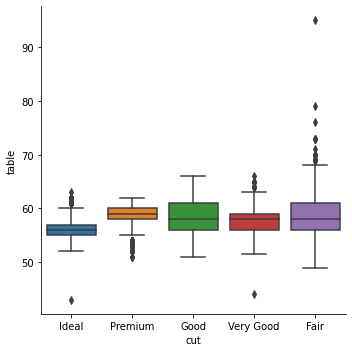

In [ ]:
#cut vs table
sns.catplot(x="cut", y="table", kind="box", data=df)

Since we knew that table attribute is also correlated with the dimension of the diamond, Based on this cut vs table plot, it is noticeable for some cut(such as ideal and premium) have some patterns. The findings are as follows:

- Ideal cut has a quite dense distribution between 52 and 60 with the lowest median around 56. 
- Premium cut has a quite unique distribution among 5 types. Premium cut has the highest median value of table with a bunch of outlier below its 25% quantile.

- Good, Very Good, and Fair cut have a quite similar pattern. They all have the same median value, while the range sparse a bit in the order of very good, good, and fair cut. In addition, Fair cut has a bunch of higher outliers for above 80 in table.

- Both ideal and very good cut has a pretty low outliers


When we combined this graph with the previous matrix correlation which reveals some correlation within attributes, we considered this attribute to be a possible good explanatory variable for predicting the cut.

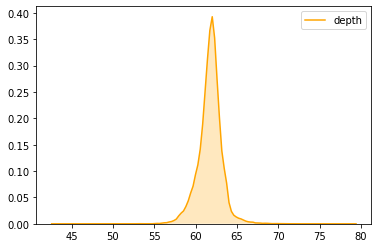

In [ ]:
#kdeplot--- depth
sns.kdeplot(df['depth'] ,shade=True , color='orange')

We can do the same step for 'depth'. It's also a nice normal distribution of density. The maximum value is around 60 to 62.

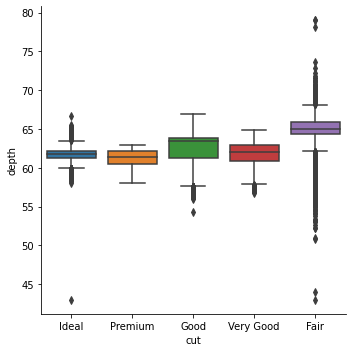

In [ ]:
#cut vs depth
sns.catplot(x="cut", y="depth", kind="box", data=df)

Depth attribute is also correlated with the dimension of the diamond. From this catplot we can see that fair cut has the highest median and lots of outliers. Meanwhile ideal cut also has lots of outliers. There are very few outliers in premium cut and very good cut. Most cut's median value is between 60 to 65.

Combined with previous plots, we also considered this attribute to be a possible good explanatory variable for predicting the cut. 

(2.0, 10.0)

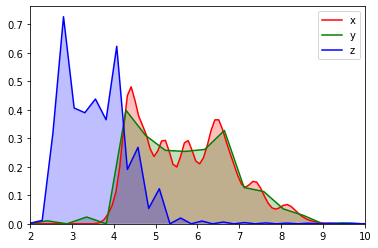

In [ ]:
#kdeplot-- xyz
sns.kdeplot(df['x'] ,shade=True , color='r' )
sns.kdeplot(df['y'] , shade=True , color='g' )
sns.kdeplot(df['z'] , shade= True , color='b')
plt.xlim(2,10)

Through this plot of x,y, and z distribution, we can tell that x and y share a very similar distribution. It makes sense, since x and y axes, whose combination can represent the surface size of the diamond, can be regarded as a rough circle or square. z has a different distribution, it also reveals the shape of the common diamond in this data set is not a cubic or other round shape. So if we want to calculate the volume of the diamond based on x,y, and z. We may regard this as a clone shape of the diamond or a rectangle. 
Also, when we check the x and y value, there are also possibilities that there is a rectangle shape as the base.
So the final volume of the diamond shape should be evaluated based on the rectangular pyramid or cone. 
By combining the belief and the actual value of the x,y, and z, we will later use a revised rectangular pyramid to evaluate the value. 

Equation will be $$  \frac{1}{3} a*b*h $$ in our case, it is $$  V= \frac{1}{3} x*y*z $$ 

Although it is not a perfect way of estimating the volume, it should give us a close approximation.


Also, for safe, since carat also reveals the same property of the diamond-size, we will also run another feature selections which take away volume term.

## Data Preparation & Prepped Data Review


In this section, we will clear up data, moved out some meaningless values such as 0 in the dimensions, and also creat the new feature we mentioned before.

In [ ]:
#check and find the rows
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [ ]:
#print the length
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

20

We can see there are 20 rows with Dimensions '0'.
We'll Drop them instead of filling them with any of Mean or Median.

In [ ]:
# drop the meanless rows
df = df[(df[['x','y','z']] != 0).all(axis=1)]
# confirm
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


Now we moved the meaningless value. We can do re-run the histogram to see the new distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1060c93320>,
      dtype=object)

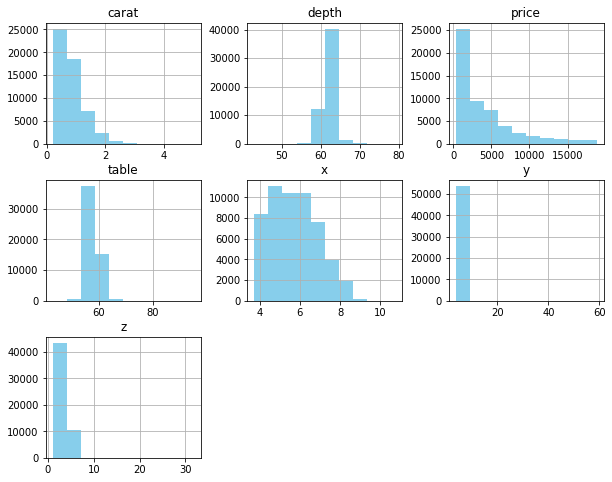

In [ ]:
#plot histogram
df.hist(figsize=(10,8), color='skyblue')

Now we can see compared graph with before. The histogram does not really change much, the reason can be contributed to the fact that these invalid values are negligible compared with the whole data size. 

As we mentioned before, due to the nature of some collinearity among x,y, and z. We used our domain knowledge along with the EDA analysis to create a new dimension- Volume. The equation was mentioned in EDA.

In [ ]:
# Create New Feature 'Volume'
df['volume'] = 1/3*df['x']*df['y']*df['z']
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,12.734010
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,11.501952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,12.692295
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,15.574860
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,17.305750


In [ ]:
#drop
df.drop(['x','y','z'], axis=1, inplace= True)
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,12.734010
1,0.21,Premium,E,SI1,59.8,61.0,326,11.501952
2,0.23,Good,E,VS1,56.9,65.0,327,12.692295
3,0.29,Premium,I,VS2,62.4,58.0,334,15.574860
4,0.31,Good,J,SI2,63.3,58.0,335,17.305750


Now we moved the xyz features. We can do re-run the EDA to see the new feature--volume.

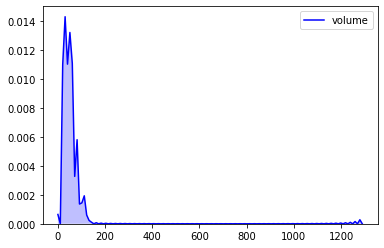

In [ ]:
#kdeplot-- xyz
sns.kdeplot(df['volume'] ,shade=True , color='b')
#sns.kdeplot(df['x'] ,shade=True , color='r' )
#sns.kdeplot(df['y'] , shade=True , color='g' )
#sns.kdeplot(df['z'] , shade= True , color='b')
#plt.xlim(2,10)

We can compare this plot with the previous xyz plot. Most diamonds volume are between 0 to 200.

Now we have a list of features to be selected for further modelings:
- Qualitative Features (Categorical): Cut, Color, Clarity.
- Quantitative Features (Numerical): Carat, Depth, Table, Price, volume(X, Y, Z).

Based on our EDA finding and domain knowledge, we will not choose 'price' and 'color' as our explanatory features. 

Our explanatory variables will be __'clarity', 'carat', 'depth', 'table' and 'volume'__.

## Classifier Modeling



Since some of the categorical variables are ordinal, dummy should not be used for dealing with this type. The ordinal encoder is the choice for explanatory variable and the label encoder will be used for the response variable. In detail, we use OrdinalEncoder() to convert 'clarity' since its in order. The 'cut' is converted by LabelEncoder().

Also, when we deal with feature selection, we choose 'clarity','carat', 'depth','table', 'volume' from the EDA, and we also tried the features which dropped attribute-volume. 
Based on our last project finding, it is legitimate to keep this volume term.  We decided to use these five features for feature selection.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

new_df = df.cut
#we also test with less feature which drops volumn attribute

#new_df = pd.concat([new_df,df[['clarity','price','carat','table']]],axis='columns')
#the feature wwithout volumn does not give a satisfying output.
new_df = pd.concat([new_df,df[['clarity','carat','depth','table','volume']]],axis='columns')

label_cut = LabelEncoder()
label_clarity = OrdinalEncoder()
new_df['cut'] = label_cut.fit_transform(new_df['cut'])
new_df['clarity'] = label_clarity.fit_transform(new_df[['clarity']])

In [ ]:
from sklearn.model_selection import train_test_split
X = new_df.drop(['cut'], axis=1)
y = new_df['cut']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

In [ ]:
new_df.head()

,cut,clarity,carat,depth,table,volume
0,2,3.0,0.23,61.5,55.0,12.734010
1,3,2.0,0.21,59.8,61.0,11.501952
2,1,4.0,0.23,56.9,65.0,12.692295
3,3,5.0,0.29,62.4,58.0,15.574860
4,1,3.0,0.31,63.3,58.0,17.305750


In [ ]:
X_train.shape

(43136, 5)

Grid search is a powerful optimization technique to find the best hyperparameters in the neural network. Firstly, to use this technique, we need to normalize the value since it is a wide range of numerical values. These ranges of values can cause longer computing time and cause algorithm not to converge.

 Here we will use MinMaxscaler to scale these numerical values.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#MinMax subtracts the minimum value in the feature and then divides by the range
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### grid search for optimization on hyperparameters

Here we use grid search to find the optimization hyperparameter. Since later Keras require another set-up of the dimension, here we setup another setting for using grid search method only.

In [ ]:
#For sklearn grid search
X_train_grid=X_train.copy()
y_train_grid=y_train.copy()
X_test_grid = X_test.copy()

Although grid search can give a nice overview of how to choose the best hyperparameters since there are a lot of parameters. Too many parameters can definitely cause trouble on computing complexity.

In the activating function, generally, the rectifier activation function(Relu) is the most popular one, while Sigmoid is used in the output layer for making binary predictions. Since sklearn is using logistics instead, we also put these parameters into the function. 

The learning rate defines how quickly a network updates its parameters.
Low learning rate slows down the learning process but converges smoothly. Larger learning rate speeds up the learning but may not converge. Therefore we generally used 0.01 for its value.

The number of epochs is the number of times the whole training data is shown to the network while training.
Increase the number of epochs until the validation accuracy starts decreasing even when training accuracy is increasing(overfitting). On these values, we all used the old school way of testing and verify our values by results.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# we try this method first
'''
# preset parameter for finding optimization
#another way of setting values
#parameters = {'solver': ['lbfgs'], 'max_iter': [100,200,300,400 ], 'alpha': 10.0 ** -np.arange(1, 3), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
parameters = {'activation' : ['relu'], 'solver': ['adam'], 'max_iter': [300 ], 'alpha': 10.0 ** -np.arange(1, 3), 'hidden_layer_sizes':[500,800], 'random_state':[0,1]}
#clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
clf = GridSearchCV(MLPClassifier(), parameters)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)
result = clf.predict(X_test)
'''

#defining grid
alphas = np.array([1,0.1,0.01,0.001,0.0001])
solvers = ['adam','lbfgs','sgd']
max_iters = [300,500]
activations= ['tanh','relu','logistic']
learning_rates=['constant', 'invscaling', 'adaptive']

# create and fit  model, testing each parameters

mlc_grid = GridSearchCV(estimator=MLPClassifier(random_state=6), param_grid=dict(learning_rate=learning_rates,alpha=alphas,solver=solvers,activation=activations,max_iter=max_iters))
mlc_grid .fit(X_train_grid, y_train_grid)
print(mlc_grid )
# summarize the results of the grid search
print('Best Score: ',mlc_grid.best_score_)
print('Best parameters: ',mlc_grid.best_params_)

Based on the result, lbfgs always failed to converge and it will not be used in the later modeling. Alpha, which is the regularization term of preventing model from overfitting or not, is possible for using default-value- 0.0001.


Also, due to the fact that our computing time is extremely high and it is not feasible to use it in the Colab. After the insights from this grid search. We mixed manual selection with domain knowledge of selecting later hyperparameters.

Our grid search used default hidden layer values of 100. The reference suggested we can choose hidden-layer based on the value between the input layer and the output layer. it is one thumb-up easy method. 

Then we start to build our three models. 


### __model 1__

Then we use the multilayer perceptron model.  And this one is based on sklearn package and as our representative of feedforward neural network. 

In [ ]:
# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  
from sklearn.model_selection import cross_val_score 

Since we used default hidden layer-100 for grid search, we varied hidden layer hyperparameter to check the difference. Here we determine the hidden layer of 50 and 150 along with default value. 

In [ ]:
from sklearn.neural_network import MLPClassifier

# Classification using Multi-layer perceptron
#we also checked other activation function(logisitic, tanh) and they did not give the same performance as relu did. 
ann = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300, activation='relu', solver ='adam', random_state=1)
ann = ann.fit(X_train, y_train)

In [ ]:
ann

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
prediction = ann.predict(X_test)
print("Mean-squared error using Neural networks MLP:", mse(y_test, prediction))
print("Accuracy with Neural networks MLP:",accuracy_score(y_test, prediction))
print("f1_score with Neural networks MLP:",f1_score(y_test, prediction, average="macro"))
print("precision with Neural networks MLP:",precision_score(y_test, prediction, average="macro"))
print("recall with Neural networks MLP:",recall_score(y_test, prediction, average="macro"))   

Mean-squared error using Neural networks MLP: 0.8456045994065282
Accuracy with Neural networks MLP: 0.7151335311572701
f1_score with Neural networks MLP: 0.6889333726276804
precision with Neural networks MLP: 0.7155346045636775
recall with Neural networks MLP: 0.6871924747762649


Based on testing data, we have accuracy of 0.715 along with 0.68 on f1 score.

### __model 2__

__Keras based back-propagation model__


In this part, we reshape the training data due to the keras requirement on the dimensionality.  

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)

#reshape data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print('train shape after reshape: {}'.format(X_train.shape))
print('test shape after reshape: {}'.format(X_test.shape))

train shape after reshape: (43136, 5, 1)
test shape after reshape: (10784, 5, 1)


Here is the reason which we choose these hyperparameters on this model:

1. Network will output a 5-dimensional vector
2. Nodes in the hidden layer will use the rectified linear activation function (ReLU), whereas nodes in the output layer will use the softmax activation function. Softmax activation: network will output a probability distribution over the 5 different o
utput classes
3. Loss function: if targets are integers, use 'sparse_categorical_crossentropy', measures the distance between the probability distribution output by the network and the true distribution of the labels
4. Keras provides the SGD class that implements the stochastic gradient descent optimizer with a learning rate and momentum.
5. The learning rate can be specified via the “lr” argument and the momentum can be specified via the “momentum” argument.
6. With learning rate decay, the learning rate is calculated each update (e.g. end of each mini-batch) as follows:

$$lrate = initial lrate \cdot  \frac{1}{1 + decay * iteration} $$

Where lrate is the learning rate for the current epoch, initial_lrate is the learning rate specified as an argument to SGD, decay is the decay rate which is greater than zero and iteration is the current update number.

On determining these hyperparameters, what we did is to try multiple parameters.

Here we also tested with multiple settings, we ended with SGD with default learning rate. SGD is out back propagation neural network. 

In [ ]:
#prepared required library
!pip install keras_metrics

In [ ]:
import keras_metrics
from tensorflow import keras
from keras import models
from keras import layers

model = models.Sequential([
    layers.Flatten(input_shape=[5, 1]),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Flatten(),
    layers.Dense(5, activation="softmax")]) # activation='sigmoid'


model.compile(loss="sparse_categorical_crossentropy",  #categorical_crossentropy/sparse_categorical_crossentropy/mean_squared_error'
              optimizer='sgd',    # opt/'rmsprop'/ sgd / adam / optimizers.SGD(lr=2e-1) / optimizers.SGD(lr=0.01)
              metrics=["accuracy",keras_metrics.precision(), keras_metrics.recall()])
model.summary()

# metrics=[keras_metrics.precision(), keras_metrics.recall()]

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
flatten_11 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 325       
Total params: 4,869
Trainable params: 4,869
Non-trainable params: 0
_________________________________________________________________


By minimizing the distance between these two distributions, train the network to output something as close as possible to the true labels.

Here we use 1000 samples of training data for validation. 

In [ ]:
# we use 1000 samples of training data
X_val = X_train[:1000]   # 1000
y_val = y_train[:1000]

Since batch size must be more than or equal to one and less than or equal to the number of samples in the training dataset. Here we tested with 512 and 128. Actually, by our testing, this hyperparameter has almost negligible effect on results. We still put this parameter here. 

In [ ]:
history = model.fit(X_train,
			y_train,
			epochs=20,
			#validation_split=0.1, 
			batch_size=128,
			#batch_size=512,
      #validation_data=(X_test, y_test))
			validation_data=(X_val, y_val))

Epoch 1/20
337/337 [==============================] - 1s 2ms/step - loss: 1.4605 - accuracy: 0.3911 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.4090 - val_accuracy: 0.3870 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
337/337 [==============================] - 0s 1ms/step - loss: 1.3771 - accuracy: 0.3998 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3892 - val_accuracy: 0.3870 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
337/337 [==============================] - 0s 1ms/step - loss: 1.3650 - accuracy: 0.3998 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3839 - val_accuracy: 0.3870 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
337/337 [==============================] - 0s 1ms/step - loss: 1.3601 - accuracy: 0.3999 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3808 - val_accuracy: 0.3870 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
337/337 [====================

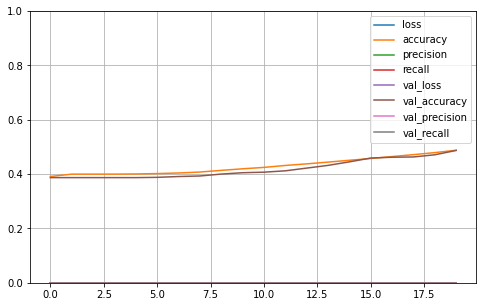

In [ ]:
#show the plot
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

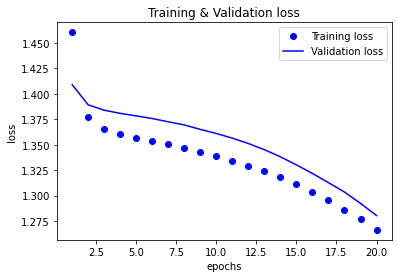

In [ ]:
#show the plot
history_dict = history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(loss)+1) #acc

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training & Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#print the result of model 2
results = model.evaluate(X_test, y_test)
results

337/337 [==============================] - 0s 1ms/step - loss: 1.2616 - accuracy: 0.4908 - precision: 0.0000e+00 - recall: 0.0000e+00


[1.2616323232650757, 0.4908197224140167, 0.0, 0.0]

In [ ]:
predictions = model.predict(X_test)
np.sum(predictions[0])

1.0

In [ ]:
# result
np.argmax(predictions[0])

2

2 represents the predicted value of the target variable, which is ideal. 

This model gave accuracy of 0.4908 on testing data and a zero of precision makes this model under the standard of good models.

### __model 3__

Our last model is also one Keras based softmax function. This neural network is ideal for dealing with multi-class classification. 

In [ ]:
import keras_metrics
from keras import models
from keras import layers
import keras_metrics
model = models.Sequential([
    layers.Flatten(input_shape=[5, 1]),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(5, activation="softmax")]) #activation='sigmoid'

model.compile(loss="sparse_categorical_crossentropy", #sparse_categorical_crossentropy/mean_squared_error
              optimizer=keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy", keras_metrics.precision(), keras_metrics.recall()])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 5)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 5)                 325       
Total params: 4,869
Trainable params: 4,869
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,
			y_train,
			epochs=20,
			#validation_split=0.1, 
			batch_size=128,
			#batch_size=512,
      #validation_data=(X_test, y_test))
			validation_data=(X_val, y_val))

Epoch 1/20
337/337 [==============================] - 1s 2ms/step - loss: 1.3427 - accuracy: 0.4195 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.2914 - val_accuracy: 0.4830 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
337/337 [==============================] - 0s 1ms/step - loss: 1.2787 - accuracy: 0.4706 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.2089 - val_accuracy: 0.5500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
337/337 [==============================] - 0s 1ms/step - loss: 1.2238 - accuracy: 0.5051 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.1685 - val_accuracy: 0.5540 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
337/337 [==============================] - 0s 1ms/step - loss: 1.1622 - accuracy: 0.5292 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.0566 - val_accuracy: 0.6140 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
337/337 [====================

We also plot related loss function as well

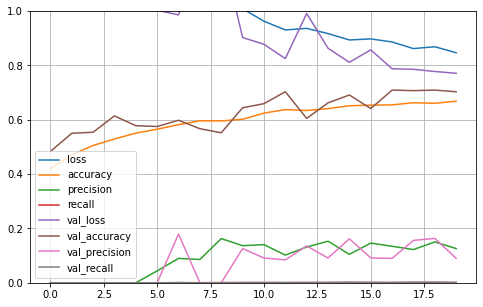

In [ ]:
# show the plot
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

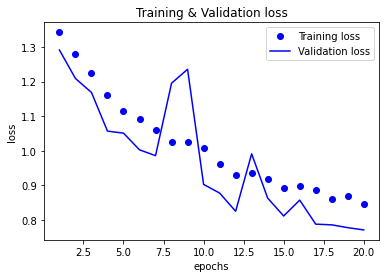

In [ ]:
#show the plot
history_dict = history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(loss)+1) #acc

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training & Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# print the result of model 3
results = model.evaluate(X_test, y_test)
results

337/337 [==============================] - 0s 1ms/step - loss: 0.7924 - accuracy: 0.7017 - precision: 0.1109 - recall: 7.6186e-04


[0.7923648357391357,
 0.7016876935958862,
 0.11094284057617188,
 0.0007618564995937049]

In [ ]:
# result
np.argmax(predictions[0])

2

Similar to model 2, 2 also represents the predicted value of the target variable, which is ideal. 

This final model gives 0.7017 accuracy along with the precision of 0.1109 on the test data. 

Since both model2 and model 3 does not have f1 score, we use the definition

$$f1= \frac{2* precision*recall }{precision+recall}$$

## Select Model

After bunch of run, we put our results on this table:

|Model      | accuracy | precision | recall     | f1-score | 
| --------  | -------- | --------- | ------     | -------- |  
| model 1   | 0.7151   | 0.7155    | 0.6872     | 0.6889   |     
| model 2   | 0.4908   | 0.0000    | 0.0000     | N/A      |        
| model 3   | 0.7017   | 0.1109    | 7.688e-04  | 0.0015   |  

As shown from the table, among these models, the model1 - feedforward Neural network gave the best result on the training data according to accuracy and the precision score. However, not shown from this table, this model also has the issues of computing expensiveness.

Model 3 has a slightly lower accuracy score on testing data, while precision and f1 score is too low to be considered as a good competitor. In addition, this model has a similar performance with model 2 on time-consuming, and it is far lower than model1.

After we took computing complexity into account, model 1 also takes the longest time on computing. However, the overwhelmingly high overall score still make it a winner among three models.

Overall, we still decide model 1 to be the best choice of all. 

## Conclusion

Based on the results and considering the computing time spent, we believe that model 1 gives the best performance in this data set for its relatively great performance and reasonable time-spending.

## Reference



1. https://towardsdatascience.com/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a#:~:text=Hyperparameters%20are%20the%20variables%20which,optimizing%20the%20weights%20and%20bias).

2. https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

3. https://www.kaggle.com/hatone/mlpclassifier-with-gridsearchcv

4. https://www.heatonresearch.com/2017/06/01/hidden-layers.html
